This notebook conducts the analyses and generates the figures reported in the accompanying paper.

Copyright (c) 2022, Stanford Neuromuscular Biomechanics Laboratory
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:
1. Redistributions of source code must retain the above copyright notice, 
this list of conditions and the following disclaimer.
2. Redistributions in binary form must reproduce the above copyright
notice, this list of conditions and the following disclaimer in the 
documentation and/or other materials provided with the distribution.
3. Neither the name of the copyright holder nor the names of its
contributors may be used to endorse or promote products derived from this
software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS
IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO,
THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR
PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR 
CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, 
EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, 
PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR
PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF
LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING
NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS
SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.


In [1]:
import os
import sys
sys.path.insert(0, os.getcwd() + '\postprocessing_helpers')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from matplotlib.lines import Line2D
from scipy.stats import spearmanr

from stats import print_ttest, run_spm, plot_sig
from read_data import get_bone_outcomes, get_analyzed_side_pf_strength
from generate_summary_waveforms import generate_summary_waveforms, average_subject_trials
from plot_emg_comparisons import plot_emg_comparisons
from get_average_walking_speeds import get_average_walking_speeds

# Demographics
Compare age, height, weight, body mass index (BMI), sex, and bone outcomes between the group with typical development (TD) and the group with spina bifida (SB). Note that the children in the group with typical development were age- and sex-matched to the children in the group with spina bifida.

In [3]:
demographics = pd.read_excel('../data/demographics.xlsx', header=1)
emg_demographics = demographics[demographics['subject'].str.contains('E')].copy() # emg secondary cohort
sb_demographics = demographics[demographics['subject'].str.contains('S')].copy() # spina bifida
td_demographics = demographics[demographics['subject'].str.contains('T')].copy() # typical development

In [4]:
# age & size
demographics_to_compare = ['age (years)', 'height (cm)',
                           'weight (kg)', 'bmi (kg/m2)']
    
for demographic_to_compare in demographics_to_compare:
    print_ttest(td_demographics, sb_demographics, demographic_to_compare)

age (years): 0.893
	TD: 10.6 (2.3)
	SB: 10.4 (2.7)
height (cm): 0.920
	TD: 140.1 (14.3)
	SB: 140.6 (17.7)
weight (kg): 0.939
	TD: 41.2 (17.3)
	SB: 41.7 (21.1)
bmi (kg/m2): 0.868
	TD: 20.2 (5.6)
	SB: 19.9 (5.3)


In [5]:
# female/male
n_td_female = np.sum(td_demographics['sex']=='female')
n_td_male = np.sum(td_demographics['sex']=='male')

n_sb_female = np.sum(sb_demographics['sex']=='female')
n_sb_male = np.sum(sb_demographics['sex']=='male')

print('TD: %iF / %iM' %(n_td_female, n_td_male))
print('SB: %iF / %iM' %(n_sb_female, n_sb_male))

TD: 8F / 8M
SB: 8F / 8M


Age, height, weight, BMI, and sex did not significantly differ between the groups.

In [6]:
# bone strength outcomes
bone_outcome_names = ['proximal cross-sectional area (mm2)',
                      'proximal cancellous bone density (mg/cm3)',
                      'distal cross-sectional area (mm2)',
                      'distal cancellous bone density (mg/cm3)', 
                      'midshaft cortical bone area (mm2)',
                      'midshaft cross-sectional area (mm2)',
                      'midshaft cortical thickness (mm)',
                      'midshaft cortical bone density (mg/cm3)'
                     ]

# get stance-limb-associated bone outcomes
td_bone_outcomes = get_bone_outcomes(td_demographics, bone_outcome_names)
sb_bone_outcomes = get_bone_outcomes(sb_demographics, bone_outcome_names)

for bone_outcome_name in bone_outcome_names:
    print_ttest(td_bone_outcomes, sb_bone_outcomes, bone_outcome_name)

proximal cross-sectional area (mm2): 0.590
	TD: 847.0 (205.6)
	SB: 897.4 (293.2)
proximal cancellous bone density (mg/cm3): 0.001
	TD: 165.1 (41.1)
	SB: 114.4 (35.6)
distal cross-sectional area (mm2): 0.651
	TD: 647.8 (165.6)
	SB: 618.0 (190.2)
distal cancellous bone density (mg/cm3): 0.258
	TD: 160.6 (39.1)
	SB: 144.9 (35.2)
midshaft cortical bone area (mm2): 0.926
	TD: 229.5 (60.8)
	SB: 226.9 (88.6)
midshaft cross-sectional area (mm2): 0.946
	TD: 293.5 (72.1)
	SB: 295.7 (105.4)
midshaft cortical thickness (mm): 0.656
	TD: 5.1 (0.8)
	SB: 5.0 (1.1)
midshaft cortical bone density (mg/cm3): 0.288
	TD: 1000.6 (48.2)
	SB: 1022.3 (60.5)


Only cancellous bone density in the proximal tibia is significantly different between the two groups.

# Musculoskeletal simulation evaluation

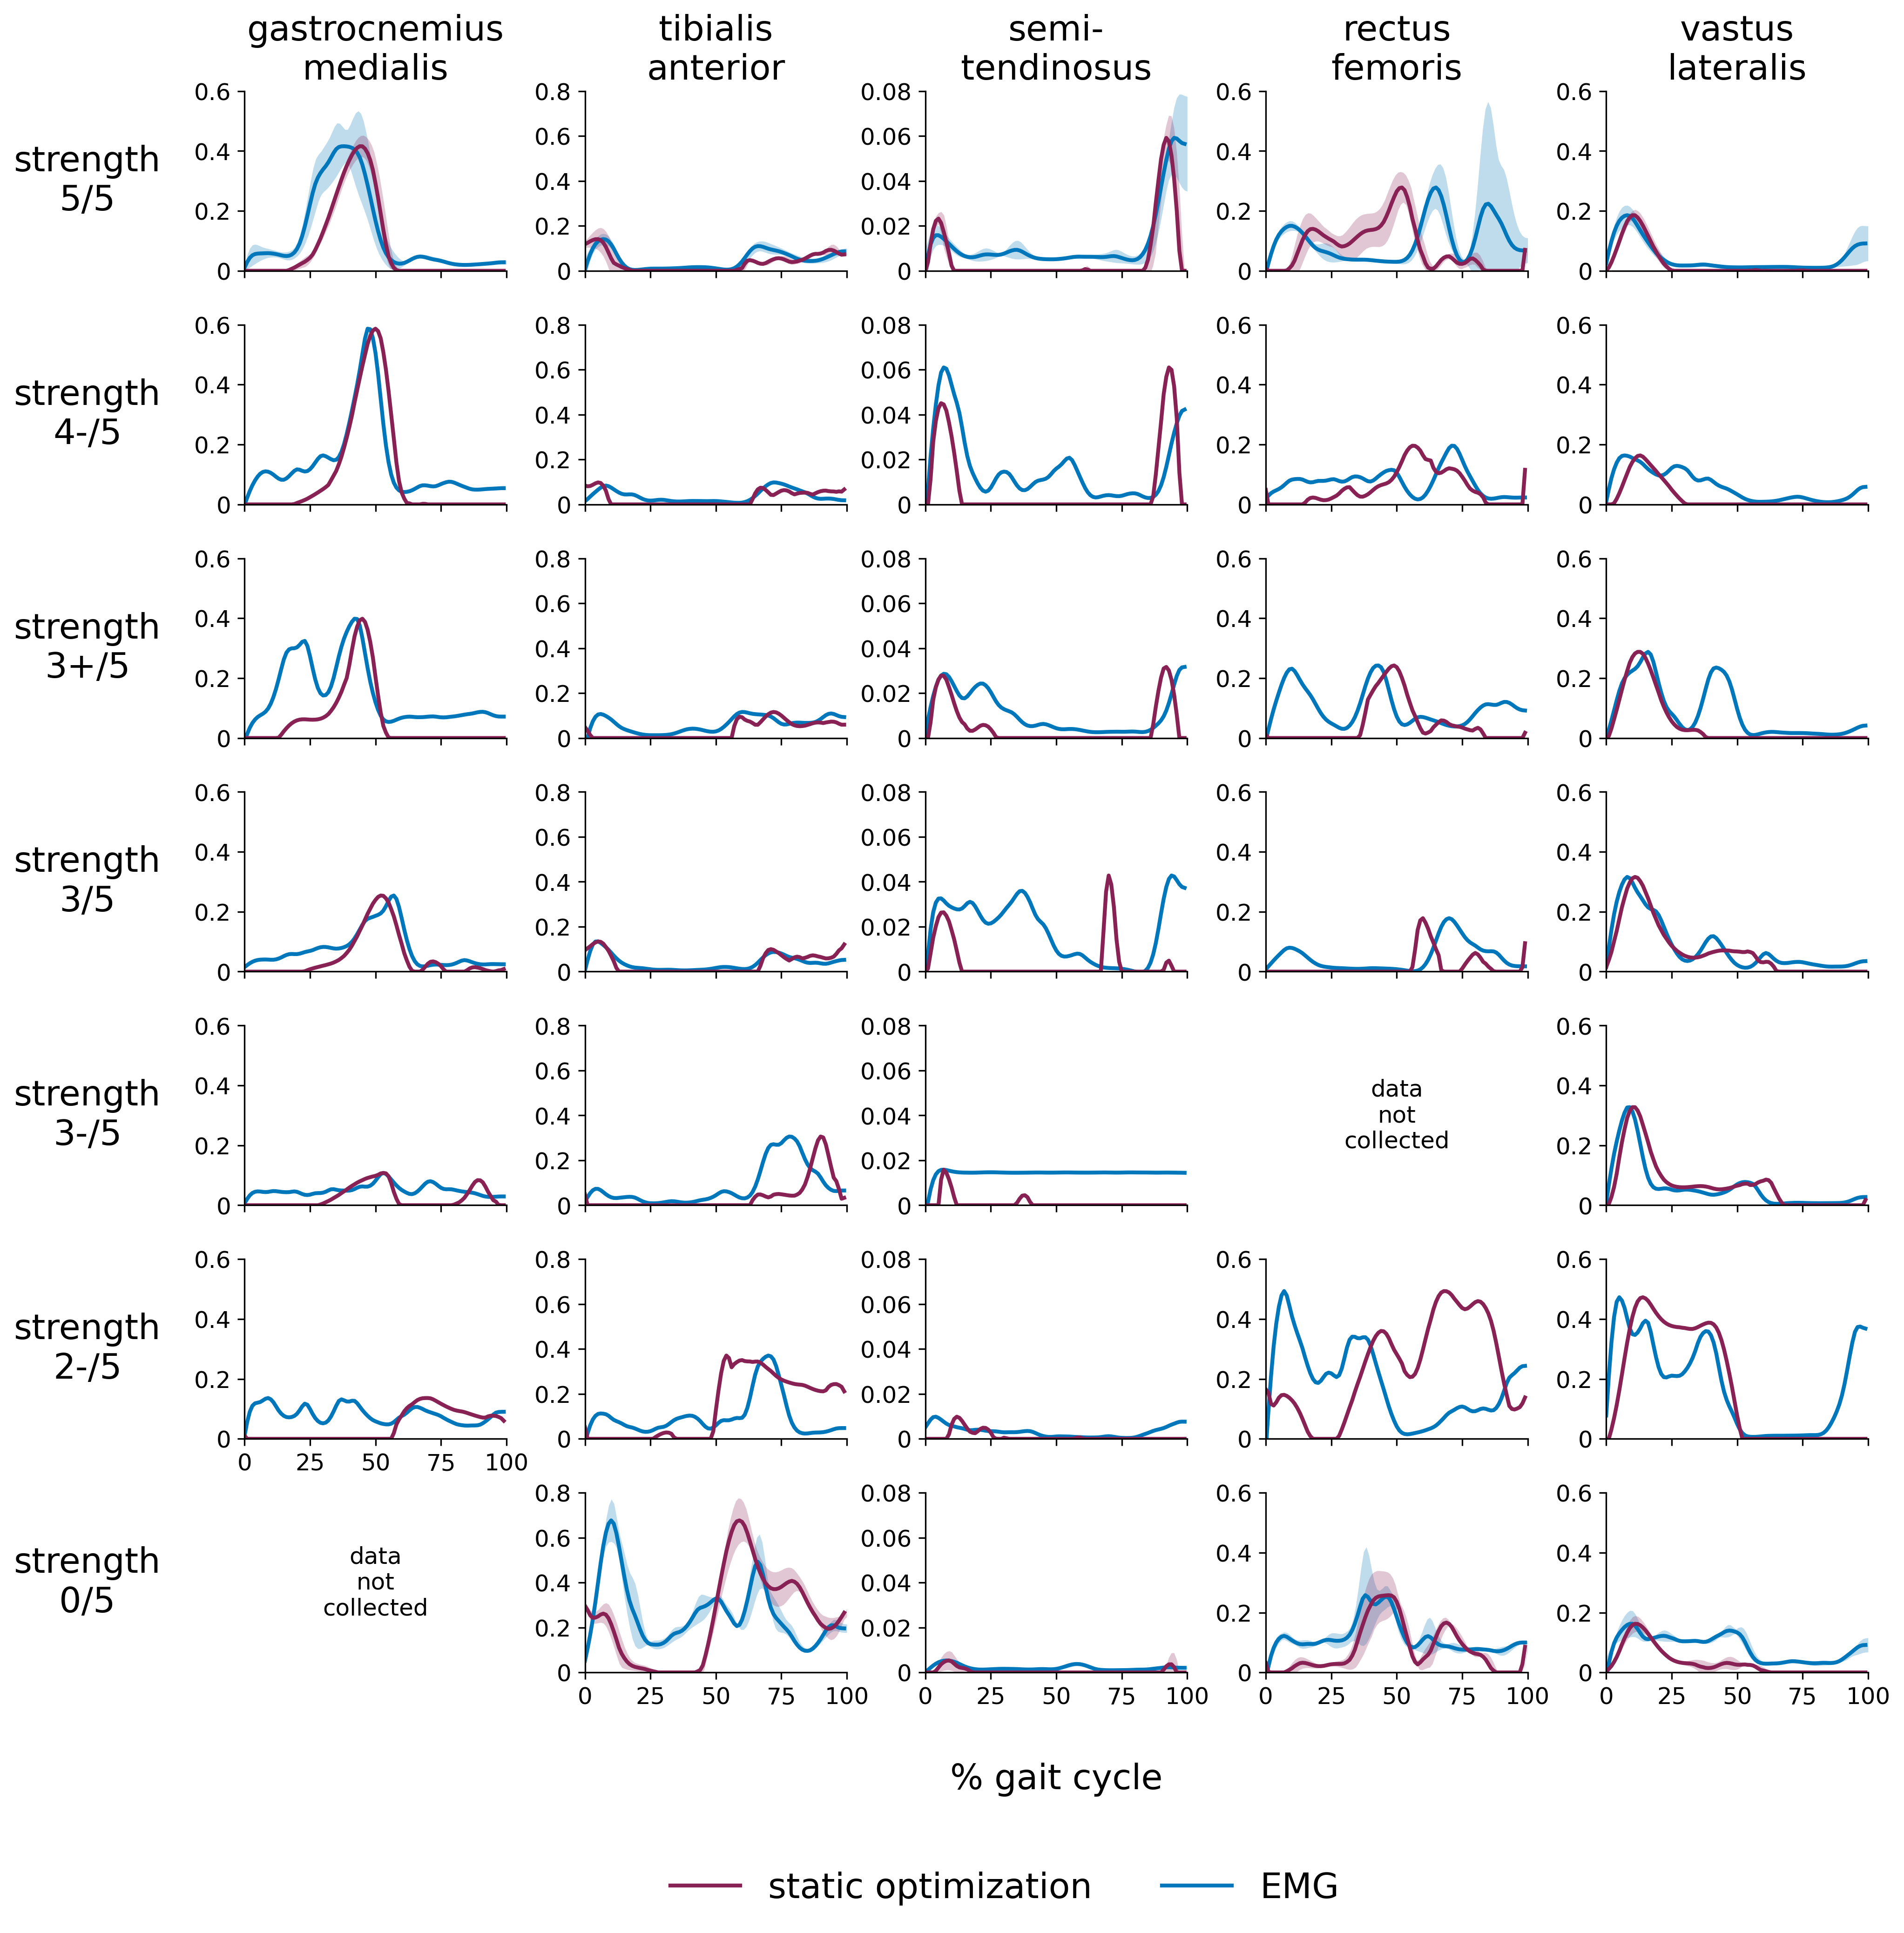

In [7]:
plot_emg_comparisons(emg_demographics)
# note: this cell will not run unless data for the 7 EMG subjects have been downloaded

Both simulated muscle activity (static optimization) and EMG recordings indicated:

- gastrocnemius activity in late stance
- tibialis anterior activity in early stance and swing
- semitendinosus activity in early stance and late swing
- vastus lateralis activity in early stance

Peak static optimization activation estimates of the gastrocnemius medialis tended to decrease with plantar flexor muscle strength.

# Walking activity and speed

In [8]:
# average daily steps in SB cohort
avg_daily_steps_mean = np.mean(sb_demographics['average daily steps'].dropna())
avg_daily_steps_sd = np.std(sb_demographics['average daily steps'].dropna())

print('SB avg daily steps: %i (SD %i)' %(avg_daily_steps_mean, avg_daily_steps_sd))

SB avg daily steps: 9656 (SD 3095)


This is comparable to average daily steps previously reported from 7 children with typical development who underwent the same activity monitoring protocol (9589 [SD 3322] steps, [Yasmeh 2016](https://doi.org/10.1080/09638288.2016.1198429)).

In [9]:
# average walking speeds
td_subjects = list(td_demographics['subject'])
td_demographics['walking speed'] = get_average_walking_speeds(td_subjects)

sb_subjects = list(sb_demographics['subject'])
sb_demographics['walking speed'] = get_average_walking_speeds(sb_subjects)

print_ttest(td_demographics, sb_demographics, 'walking speed')

walking speed: 0.004
	TD: 1.3 (0.1)
	SB: 1.1 (0.1)


Average walking speed, measured from the gait analysis trials, was slower in the group with spina bifida than in the group with typical development.

# Gait waveforms

## Generate summary waveforms of primary cohort

In [10]:
waveform_filename = '../postprocessing/summary_waveforms.pkl'
simulation_directory = '../simulation/'

if not os.path.exists(waveform_filename):
    waveforms = generate_summary_waveforms(simulation_directory)
    waveforms.to_pickle(waveform_filename)
else:
    waveforms = pd.read_pickle(waveform_filename)

waveforms = waveforms.drop(columns=['walk'])

waveforms = average_subject_trials(waveforms)
td_waveforms = waveforms[waveforms['subject'].str.contains('T')].copy()
sb_waveforms = waveforms[waveforms['subject'].str.contains('S')].copy()

td_bodymasses = td_waveforms['bodymass']
sb_bodymasses = sb_waveforms['bodymass']

## Conduct SPM analysis of waveforms

In [11]:
COLOR_TD = 'k'
COLOR_SB = '#CC3311'

KINEM_NAME_MAP = {'hip_flexion': 'hip flexion (deg)',
                  'hip_adduction': 'hip adduction (deg)',
                  'knee_angle': 'knee flexion (deg)',
                  'ankle_angle': 'ankle dorsiflexion (deg)'}

KINET_NAME_MAP = {'hip_flexion_moment': 'hip flexion moment (N-m/kg)',
                  'hip_adduction_moment': 'hip adduction moment (N-m/kg)',
                  'knee_angle_moment': 'knee flexion moment (N-m/kg)',
                  'ankle_angle_moment': 'ankle dorsiflexion moment (N-m/kg)'}

GRF_NAME_MAP = {'grfx': 'antero- posterior GRF',
                'grfz': 'medio- lateral GRF',
                'grfy': 'vertical GRF',
                }

FORCE_NAME_MAP = {'walker_knee_on_tibia_in_tibia_shear': 'shear knee force (xBW)',
                  'walker_knee_on_tibia_in_tibia_fy': 'compressive knee force (xBW)',
                  'walker_knee_on_tibia_in_tibia_total': 'total knee force (xBW)',
                  'ankle_on_tibia_in_tibia_shear': 'shear ankle force (xBW)',
                  'ankle_on_tibia_in_tibia_fy': 'compressive ankle force (xBW)',
                  'ankle_on_tibia_in_tibia_total': 'total ankle force (xBW)'}

### Kinematics

0.03191364971360322
9.257824653974289e-05


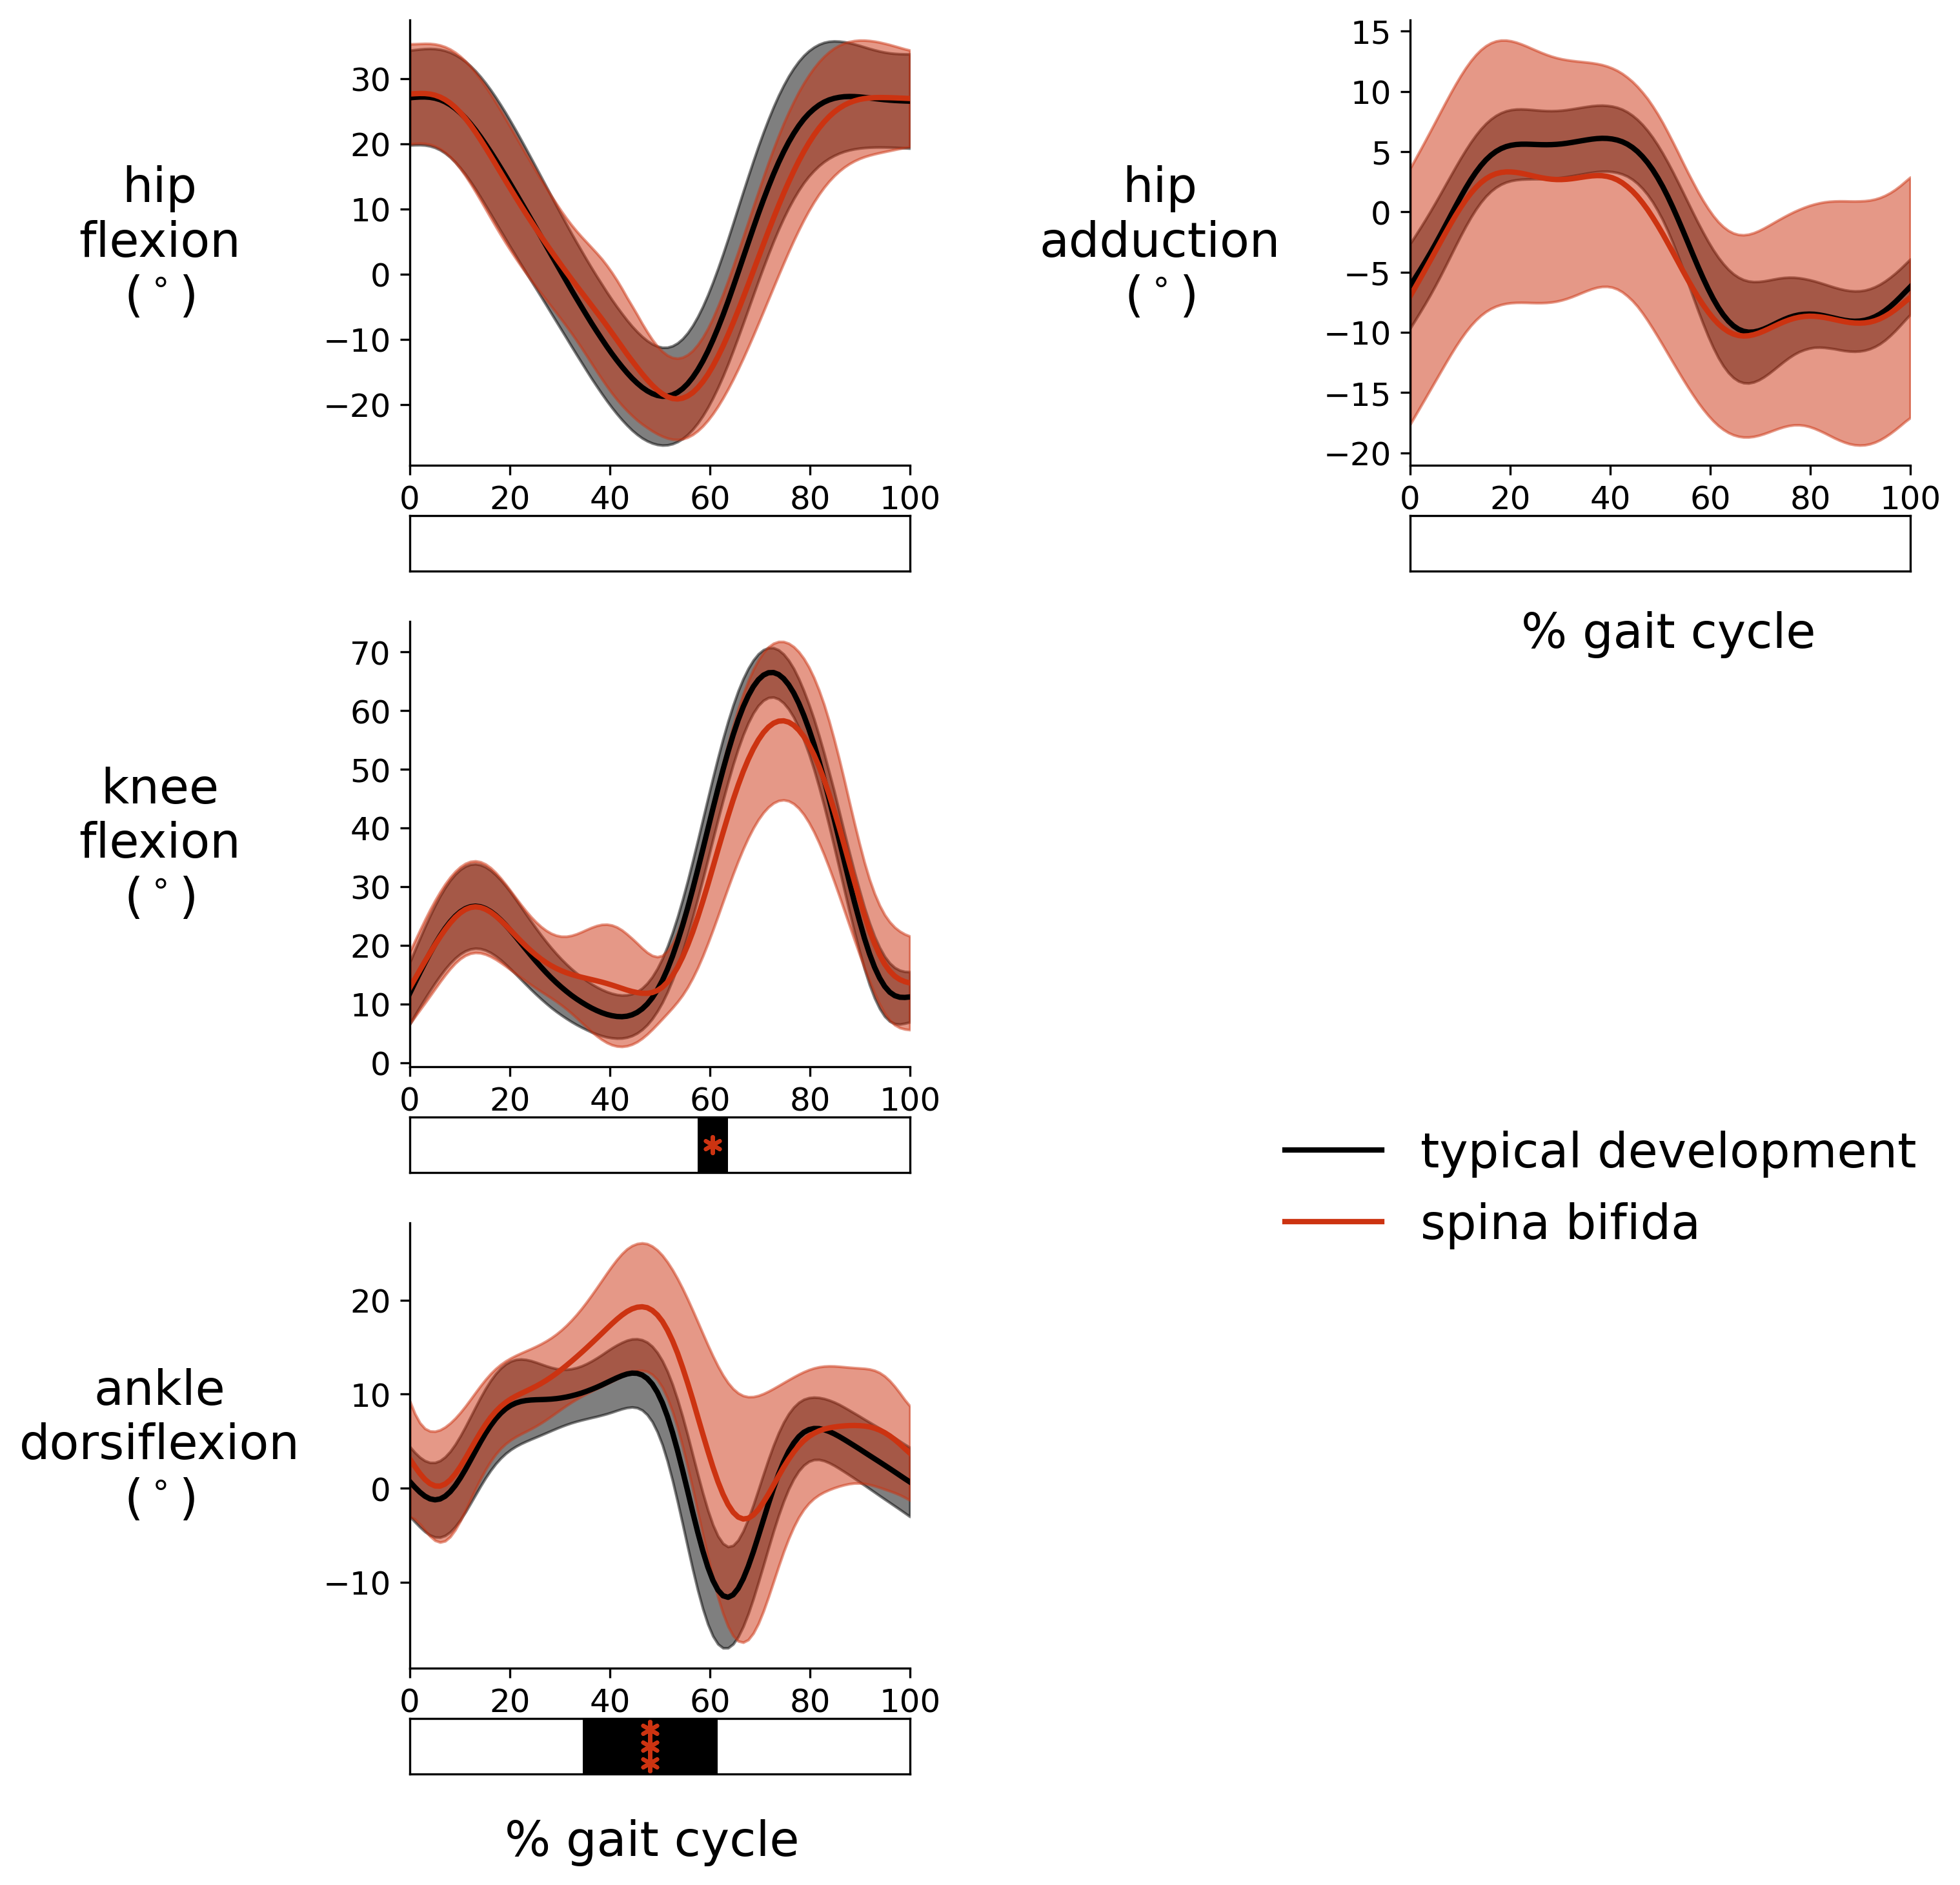

In [12]:
f, axes = plt.subplots(6, 2, gridspec_kw={'height_ratios': [8,1,8,1,8,1]}, dpi=300)
plot_cells = [1, 2, 5, 9]
kinem_names = list(KINEM_NAME_MAP.keys())
for i in range(len(kinem_names)):
    plt.subplot(6, 2, plot_cells[i])
    waveform = kinem_names[i]
    td_waveform = td_waveforms[waveform]
    sb_waveform = sb_waveforms[waveform]
    
    td_data = np.stack(td_waveform.to_numpy())
    sb_data = np.stack(sb_waveform.to_numpy())
    
    ylabel = KINEM_NAME_MAP[waveform][:-6]
    
    ti = run_spm(td_data, sb_data, waveform, color1=COLOR_TD, color2=COLOR_SB)
    ylabel = ylabel + ' ($^\circ$)'
    ylabel = ylabel.replace(' ', '\n')
    plt.ylabel(ylabel, fontsize=18, rotation=0, verticalalignment='center')
    plt.xticks(np.linspace(0,100,6), [0, 20, 40, 60, 80, 100], fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlim([0,100])
    
    ax = plt.gca()
    ax.yaxis.set_label_coords(-0.5, 0.5)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
        
    plt.subplot(6, 2, plot_cells[i] + 2)
    plot_sig(ti, color=COLOR_SB)
    plt.xlim([0,100])

for i in [6, 8, 10, 12]:
    fig = plt.subplot(6, 2, i)
    plt.box(False)
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

f.text(0.25, 0.09, '% gait cycle', horizontalalignment='center', fontsize=18)
f.text(0.775, 0.61, '% gait cycle', horizontalalignment='center', fontsize=18)

f.set_figheight(12)
f.set_figwidth(10)
td_line = Line2D([0,1],[0,1], linestyle='-', linewidth=2, color=COLOR_TD)
sb_line = Line2D([0,1],[0,1], linestyle='-', linewidth=2, color=COLOR_SB)
plt.legend([td_line, sb_line], ['typical development', 'spina bifida'],
           loc='center right', fontsize=18, bbox_to_anchor=(0.1, 10, 1, 1),
           frameon=False)
plt.subplots_adjust(wspace=1)
plt.savefig('../postprocessing/figures/kinematics.png', bbox_inches='tight')

### Joint moments

0.02507743019908326
0.040261227765094665
0.03703474219695124


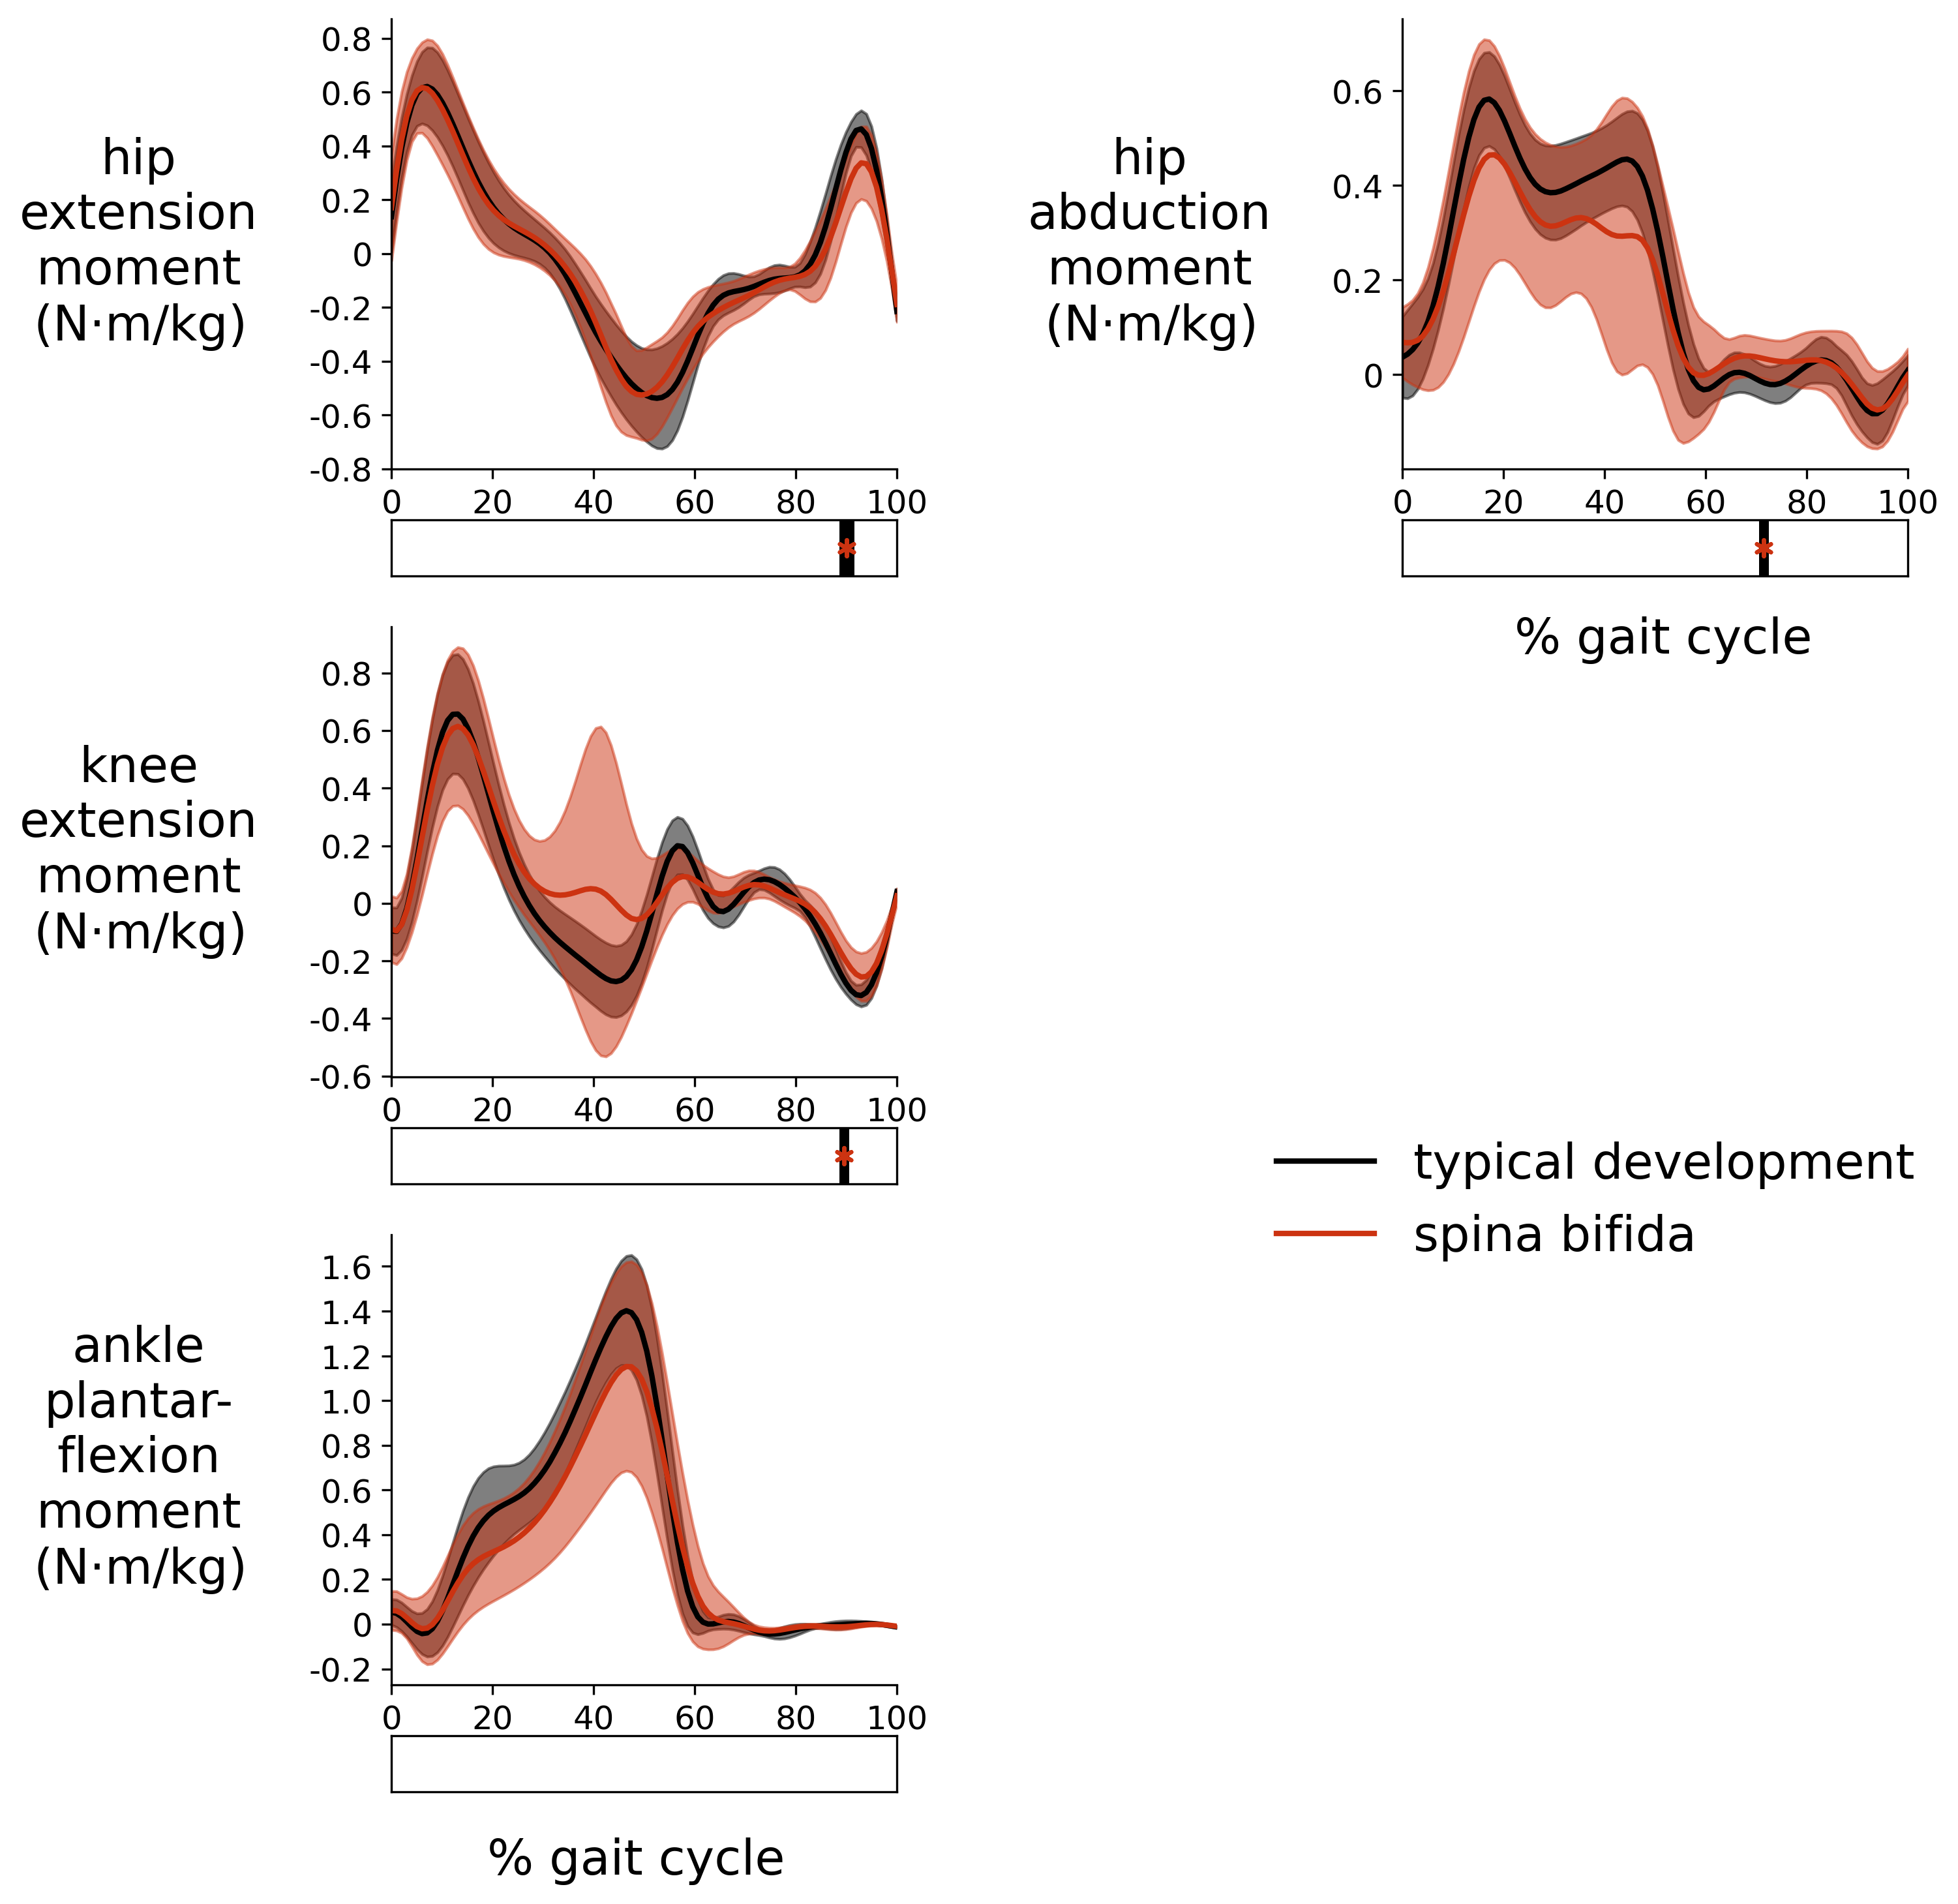

In [13]:
f, axes = plt.subplots(6, 2, gridspec_kw={'height_ratios': [8,1,8,1,8,1]} , dpi=300)
plot_cells = [1, 2, 5, 9]
kinet_names = list(KINET_NAME_MAP.keys())
for i in range(len(kinet_names)):
    plt.subplot(6, 2, plot_cells[i])
    waveform = kinet_names[i]
    td_waveform = td_waveforms[waveform]
    sb_waveform = sb_waveforms[waveform]
    
    td_data = np.stack(np.divide(td_waveform, td_bodymasses))
    sb_data = np.stack(np.divide(sb_waveform, sb_bodymasses))
    
    if waveform == 'ankle_angle_moment':
        td_data = -1*td_data
        sb_data = -1*sb_data
        ylabel = 'ankle plantar- flexion moment'
    elif waveform == 'hip_adduction_moment':
        td_data = -1*td_data
        sb_data = -1*sb_data
        ylabel = 'hip abduction moment'
    elif waveform == 'hip_flexion_moment':
        td_data = -1*td_data
        sb_data = -1*sb_data
        ylabel = 'hip extension moment'
    elif waveform == 'knee_angle_moment':
        td_data = -1*td_data
        sb_data = -1*sb_data
        ylabel = 'knee extension moment'
    else:
        ylabel = KINET_NAME_MAP[waveform][:-9]
    
    ti = run_spm(td_data, sb_data, waveform, color1=COLOR_TD, color2=COLOR_SB)
    ylabel = ylabel + ' (N$\cdot$m/kg)'
    ylabel = ylabel.replace(' ', '\n')
    plt.ylabel(ylabel, fontsize=18, rotation=0, verticalalignment='center')
    plt.xticks(np.linspace(0,100,6), [0, 20, 40, 60, 80, 100], fontsize=12)
    plt.xlim([0,100])

    ax = plt.gca()
    ax.yaxis.set_label_coords(-0.5, 0.5)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
        
    ymin, ymax = ax.get_ylim()  
    yticks = [-1.0, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4,
             1.6, 1.8, 2.0]
    plt.yticks(yticks, yticks, fontsize=12)
    plt.ylim((ymin, ymax))
        
    plt.subplot(6, 2, plot_cells[i] + 2)
    plot_sig(ti, color=COLOR_SB)
    plt.xlim([0,100])

for i in [6, 8, 10, 12]:
    fig = plt.subplot(6, 2, i)
    plt.box(False)
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

f.text(0.25, 0.09, '% gait cycle', horizontalalignment='center', fontsize=18)
f.text(0.775, 0.61, '% gait cycle', horizontalalignment='center', fontsize=18)

f.set_figheight(12)
f.set_figwidth(10)
td_line = Line2D([0,1],[0,1], linestyle='-', linewidth=2, color=COLOR_TD)
sb_line = Line2D([0,1],[0,1], linestyle='-', linewidth=2, color=COLOR_SB)
plt.legend([td_line, sb_line], ['typical development', 'spina bifida'], 
           loc='center right', fontsize=18, bbox_to_anchor=(0.1, 10, 1, 1),
           frameon=False)
plt.subplots_adjust(wspace=1)
plt.savefig('../postprocessing/figures/moments.png', bbox_inches='tight')

In [14]:
# compare max/min values
for i in range(len(kinet_names)):
    waveform = kinet_names[i]
    td_waveform = td_waveforms[waveform]
    sb_waveform = sb_waveforms[waveform]
    
    td_data = np.stack(np.divide(td_waveform, td_bodymasses))
    sb_data = np.stack(np.divide(sb_waveform, sb_bodymasses))
    
    td_data = np.abs(td_data)
    sb_data = np.abs(sb_data)
    
    td_peaks = pd.DataFrame({waveform + ' max': np.max(td_data, axis=1),
                             waveform + ' min': np.min(td_data, axis=1)})
    sb_peaks = pd.DataFrame({waveform + ' max': np.max(sb_data, axis=1),
                             waveform + ' min': np.min(sb_data, axis=1)})
    
    print_ttest(td_peaks, sb_peaks, waveform + ' max', p_digits=4)
    print_ttest(td_peaks, sb_peaks, waveform + ' min', p_digits=4)

hip_flexion_moment max: 0.4226
	TD: 0.7 (0.1)
	SB: 0.7 (0.2)
hip_flexion_moment min: 0.1136
	TD: 0.0 (0.0)
	SB: 0.0 (0.0)
hip_adduction_moment max: 0.2705
	TD: 0.6 (0.1)
	SB: 0.5 (0.2)
hip_adduction_moment min: 0.6635
	TD: 0.0 (0.0)
	SB: 0.0 (0.0)
knee_angle_moment max: 0.8652
	TD: 0.7 (0.2)
	SB: 0.7 (0.4)
knee_angle_moment min: 0.9057
	TD: 0.0 (0.0)
	SB: 0.0 (0.0)
ankle_angle_moment max: 0.0983
	TD: 1.4 (0.2)
	SB: 1.2 (0.5)
ankle_angle_moment min: 0.9934
	TD: 0.0 (0.0)
	SB: 0.0 (0.0)


No significant differences were detected in the peak values of the joint moment waveforms.

### Ground reaction forces

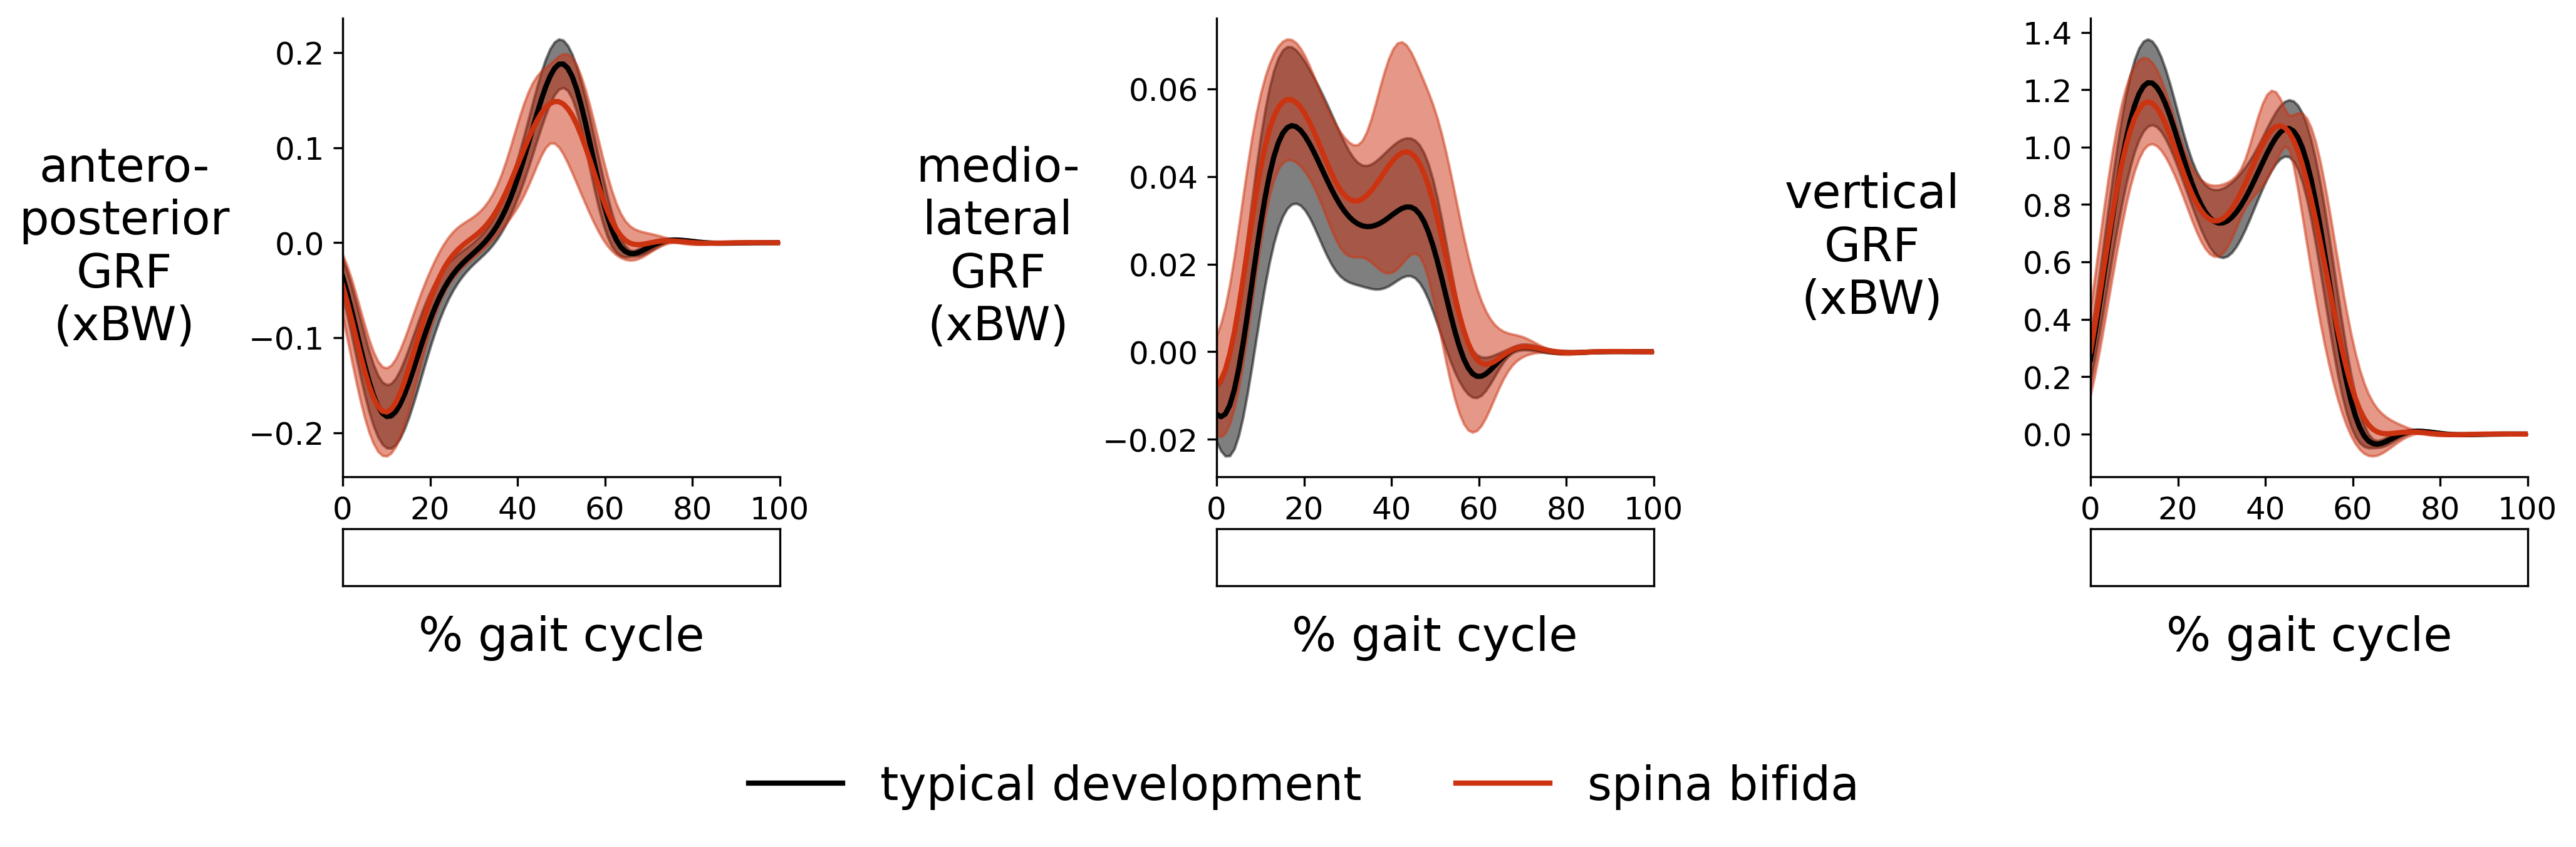

In [15]:
f, axes = plt.subplots(2, 3, gridspec_kw={'height_ratios': [8, 1]}, dpi=300)
plot_cells = [1, 2, 3]
grf_names = list(GRF_NAME_MAP.keys())
for i in range(len(grf_names)):
    plt.subplot(2, 3, plot_cells[i])
    waveform = grf_names[i]

    sb_waveform = sb_waveforms[waveform]
    td_waveform = td_waveforms[waveform]

    sb_data = np.stack(np.divide(sb_waveform, 9.81*sb_bodymasses))
    td_data = np.stack(np.divide(td_waveform, 9.81*td_bodymasses))
    
    ti = run_spm(td_data, sb_data, waveform, color1=COLOR_TD, color2=COLOR_SB)
    ylabel = GRF_NAME_MAP[waveform] + ' (xBW)'
    ylabel = ylabel.replace(' ', '\n')
    plt.ylabel(ylabel, fontsize=18, rotation=0, verticalalignment='center')
    plt.xticks(np.linspace(0,100,6), [0, 20, 40, 60, 80, 100], fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlim([0,100])
    plt.xlabel('% gait cycle', fontsize=18)
    
    ax = plt.gca()
    ax.yaxis.set_label_coords(-0.5, 0.5)
    ax.xaxis.set_label_coords(0.5, -0.3)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.subplot(2, 3, plot_cells[i] + 3)
    plot_sig(ti, color=COLOR_SB)
    plt.xlim([0,100])

f.set_figheight(4)
f.set_figwidth(15)
td_line = Line2D([0,1],[0,1], linestyle='-', linewidth=2, color=COLOR_TD)
sb_line = Line2D([0,1],[0,1], linestyle='-', linewidth=2, color=COLOR_SB)
plt.legend([td_line, sb_line], ['typical development', 'spina bifida'], 
           loc='center', fontsize=18, bbox_to_anchor=(-2.3, -4, 1, 1), frameon=False,
           ncol=2)
plt.subplots_adjust(wspace=1)
plt.savefig('../postprocessing/figures/grfs.png', bbox_inches='tight')

### Tibial forces

In [16]:
def get_shear_and_total_forces(waveforms, force):
    """calculate shear and total forces from component joint forces.
    
    Args:
        waveforms (pd DataFrame): dataframe containing component waveforms.
        force (str): force name.
        
    Returns:
        shear_forces (np array): calculated shear force magnitudes.
        total_forces (np array): calculated total joint force magnitudes.
        
    """
    fx = np.stack(waveforms[force + '_fx'].to_numpy())
    fy = np.stack(waveforms[force + '_fy'].to_numpy())
    fz = np.stack(waveforms[force + '_fz'].to_numpy())

    shear_forces = np.sqrt(np.square(fx) + np.square(fz))
    total_forces = np.sqrt(np.square(fx) + np.square(fy) + np.square(fz))

    return shear_forces, total_forces

In [17]:
# shear forces
td_knee_shear, td_knee_total = get_shear_and_total_forces(td_waveforms, 'walker_knee_on_tibia_in_tibia')
td_ankle_shear, td_ankle_total = get_shear_and_total_forces(td_waveforms, 'ankle_on_tibia_in_tibia')
sb_knee_shear, sb_knee_total = get_shear_and_total_forces(sb_waveforms, 'walker_knee_on_tibia_in_tibia')
sb_ankle_shear, sb_ankle_total = get_shear_and_total_forces(sb_waveforms, 'ankle_on_tibia_in_tibia')

td_waveforms['walker_knee_on_tibia_in_tibia_shear'] = td_knee_shear.tolist()
td_waveforms['walker_knee_on_tibia_in_tibia_total'] = td_knee_total.tolist()
td_waveforms['ankle_on_tibia_in_tibia_shear'] = td_ankle_shear.tolist()
td_waveforms['ankle_on_tibia_in_tibia_total'] = td_ankle_total.tolist()

sb_waveforms['walker_knee_on_tibia_in_tibia_shear'] = sb_knee_shear.tolist()
sb_waveforms['walker_knee_on_tibia_in_tibia_total'] = sb_knee_total.tolist()
sb_waveforms['ankle_on_tibia_in_tibia_shear'] = sb_ankle_shear.tolist()
sb_waveforms['ankle_on_tibia_in_tibia_total'] = sb_ankle_total.tolist()

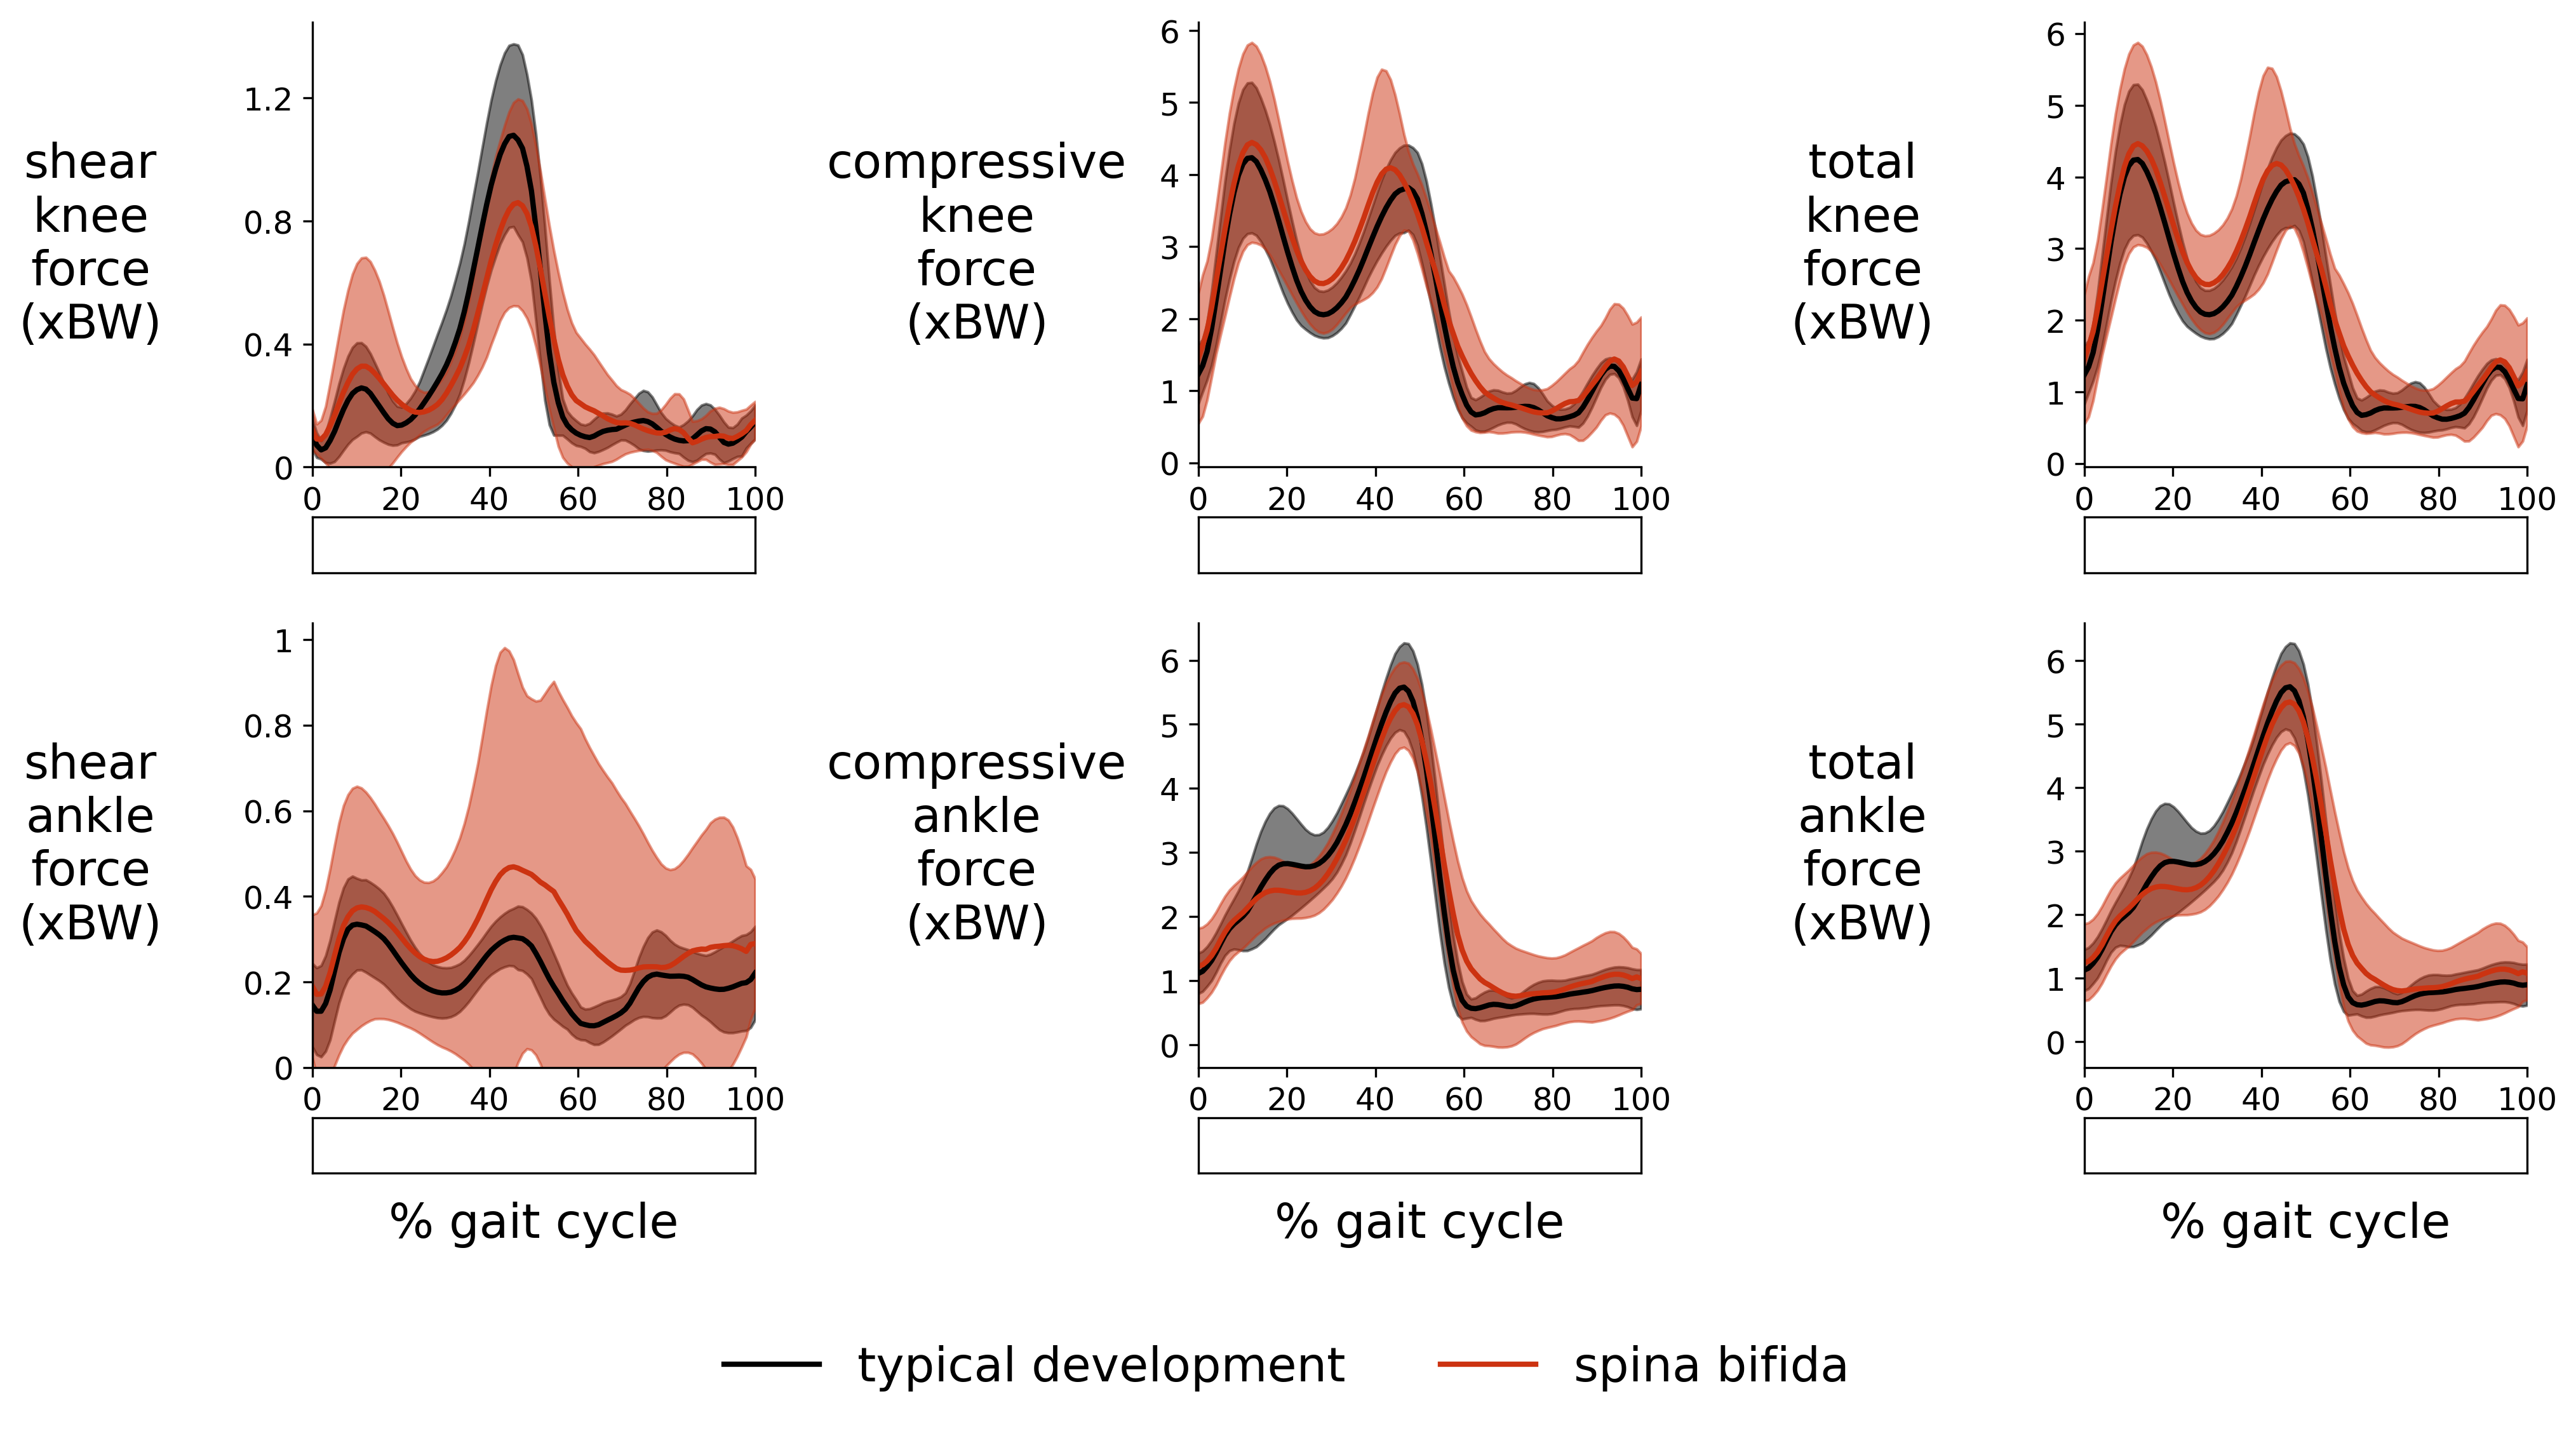

In [18]:
f, axes = plt.subplots(4, 3, gridspec_kw={'height_ratios': [8, 1, 8, 1]}, dpi=300)
plot_cells = [1, 2, 3, 7, 8, 9]
force_names = list(FORCE_NAME_MAP.keys())
for i in range(len(force_names)):
    plt.subplot(4, 3, plot_cells[i])
    waveform = force_names[i]
    
    if 'fy' in waveform:   
        sb_waveform = sb_waveforms[waveform]
        td_waveform = td_waveforms[waveform]

        sb_data = np.stack(np.divide(sb_waveform, 9.81*sb_bodymasses))
        td_data = np.stack(np.divide(td_waveform, 9.81*td_bodymasses))
    else:
        td_waveform = np.array([td_waveforms[waveform].iloc[i] for i in range(len(td_waveforms))])
        sb_waveform = np.array([sb_waveforms[waveform].iloc[i] for i in range(len(sb_waveforms))])
        
        td_data = np.divide(td_waveform, 9.81*np.array(td_bodymasses).reshape([16, 1]))
        sb_data = np.divide(sb_waveform, 9.81*np.array(sb_bodymasses).reshape([16, 1]))    
    
    if waveform == 'walker_knee_on_tibia_in_tibia_fy': # invert
        sb_data = -1*sb_data
        td_data = -1*td_data
    
    ti = run_spm(td_data, sb_data, waveform, color1=COLOR_TD, color2=COLOR_SB)
    ylabel = FORCE_NAME_MAP[waveform]
    ylabel = ylabel.replace(' ', '\n')
    plt.ylabel(ylabel, fontsize=18, rotation=0, verticalalignment='center')
    plt.xticks(np.linspace(0,100,6), [0, 20, 40, 60, 80, 100], fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlim([0,100])
    
    if plot_cells[i] in [7, 8, 9]:
        plt.xlabel('% gait cycle', fontsize=18)
    
    ax = plt.gca()
    ax.yaxis.set_label_coords(-0.5, 0.5)
    ax.xaxis.set_label_coords(0.5, -0.3)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    if 'shear' in ylabel: # don't let shear dip below zero
        _, ylim = ax.get_ylim()
        if 'ankle' in ylabel:
            yticks = [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
        elif 'knee' in ylabel:
            yticks = [0, 0.4, 0.8, 1.2, 1.6, 2]
        plt.yticks(yticks, yticks)
        plt.ylim([0, ylim])
            
    plt.subplot(4, 3, plot_cells[i] + 3)
    plot_sig(ti, color=COLOR_SB)
    plt.xlim([0,100])
    
f.set_figheight(8)
f.set_figwidth(15)
td_line = Line2D([0,1],[0,1], linestyle='-', linewidth=2, color=COLOR_TD)
sb_line = Line2D([0,1],[0,1], linestyle='-', linewidth=2, color=COLOR_SB)
plt.legend([td_line, sb_line], ['typical development', 'spina bifida'],
           loc='center', fontsize=18, bbox_to_anchor=(-2.3, -4, 1, 1), frameon=False,
           ncol=2)
plt.subplots_adjust(wspace=1)
plt.savefig('../postprocessing/figures/joint_forces.png', bbox_inches='tight')

In [19]:
for i in range(len(force_names)):
    waveform = force_names[i]
    
    if waveform == 'walker_knee_on_tibia_in_tibia_shear':
        td_data = np.divide(td_knee_shear, 9.81*np.array(td_bodymasses).reshape([16,1]))
        sb_data = np.divide(sb_knee_shear, 9.81*np.array(sb_bodymasses).reshape([16,1]))
    elif waveform == 'ankle_on_tibia_in_tibia_shear':
        td_data = np.divide(td_ankle_shear, 9.81*np.array(td_bodymasses).reshape([16,1]))
        sb_data = np.divide(sb_ankle_shear, 9.81*np.array(sb_bodymasses).reshape([16,1]))
    elif waveform == 'walker_knee_on_tibia_in_tibia_total':
        td_data = np.divide(td_knee_total, 9.81*np.array(td_bodymasses).reshape([16,1]))
        sb_data = np.divide(sb_knee_total, 9.81*np.array(sb_bodymasses).reshape([16,1]))
    elif waveform == 'ankle_on_tibia_in_tibia_total':
        td_data = np.divide(td_ankle_total, 9.81*np.array(td_bodymasses).reshape([16,1]))
        sb_data = np.divide(sb_ankle_total, 9.81*np.array(sb_bodymasses).reshape([16,1]))
    else:   
        td_waveform = td_waveforms[waveform]
        sb_waveform = sb_waveforms[waveform]

        td_data = np.stack(np.divide(td_waveform, 9.81*td_bodymasses))
        sb_data = np.stack(np.divide(sb_waveform, 9.81*sb_bodymasses))
            
    td_data = np.abs(td_data)
    sb_data = np.abs(sb_data)
    
    td_peaks = pd.DataFrame({waveform + ' max': np.max(td_data, axis=1),
                             waveform + ' min': np.min(td_data, axis=1)})
    sb_peaks = pd.DataFrame({waveform + ' max': np.max(sb_data, axis=1),
                             waveform + ' min': np.min(sb_data, axis=1)})
    
    print_ttest(td_peaks, sb_peaks, waveform + ' max', p_digits=4)
    print_ttest(td_peaks, sb_peaks, waveform + ' min', p_digits=4)

walker_knee_on_tibia_in_tibia_shear max: 0.2317
	TD: 1.1 (0.3)
	SB: 1.0 (0.3)
walker_knee_on_tibia_in_tibia_shear min: 0.6369
	TD: 0.0 (0.0)
	SB: 0.0 (0.0)
walker_knee_on_tibia_in_tibia_fy max: 0.2157
	TD: 4.5 (0.9)
	SB: 5.1 (1.4)
walker_knee_on_tibia_in_tibia_fy min: 0.4253
	TD: 0.5 (0.1)
	SB: 0.6 (0.3)
walker_knee_on_tibia_in_tibia_total max: 0.2135
	TD: 4.6 (0.9)
	SB: 5.2 (1.4)
walker_knee_on_tibia_in_tibia_total min: 0.4253
	TD: 0.5 (0.1)
	SB: 0.6 (0.3)
ankle_on_tibia_in_tibia_shear max: 0.1335
	TD: 0.4 (0.1)
	SB: 0.6 (0.6)
ankle_on_tibia_in_tibia_shear min: 0.3760
	TD: 0.1 (0.0)
	SB: 0.1 (0.2)
ankle_on_tibia_in_tibia_fy max: 0.2937
	TD: 5.7 (0.6)
	SB: 5.5 (0.7)
ankle_on_tibia_in_tibia_fy min: 0.2726
	TD: 0.5 (0.1)
	SB: 0.6 (0.4)
ankle_on_tibia_in_tibia_total max: 0.4007
	TD: 5.7 (0.6)
	SB: 5.5 (0.7)
ankle_on_tibia_in_tibia_total min: 0.2681
	TD: 0.5 (0.1)
	SB: 0.6 (0.5)


No significant differences were detected in the peak values of the joint moment waveforms.

# Plantar flexor muscle strength and tibial forces

In [20]:
def get_peak_forces(waveforms):
    """extract peak forces from force waveforms.
    
    Args:
        waveforms (pd DataFrame): dataframe containing tibial force waveforms.
    
    Returns:
        peak_forces (pd DataFrame): dataframe containing peaks of the tibial force
                                    waveforms.
    """
    tibial_force_names = ['walker_knee_on_tibia_in_tibia_shear',
                          'ankle_on_tibia_in_tibia_shear',
                          'walker_knee_on_tibia_in_tibia_fy', 
                          'ankle_on_tibia_in_tibia_fy']
    tibial_forces = waveforms[tibial_force_names].copy()
    tibial_forces = tibial_forces.to_numpy()
    
    peak_forces = []
    for i in range(tibial_forces.shape[0]):
        row_data = tibial_forces[i]
        new_peak_data = []
        for j in range(len(row_data)):
            data = row_data[j]
            tibial_force_name = tibial_force_names[j]
            if tibial_force_name == 'walker_knee_on_tibia_in_tibia_fy':
                new_peak_data.append(np.min(data))
            else:
                new_peak_data.append(np.max(data))
        peak_forces.append(new_peak_data)

    peak_forces = pd.DataFrame(peak_forces, columns=[tibial_force_name + '_peak' for
                                                     tibial_force_name in
                                                     tibial_force_names])

    peak_forces['subject'] = list(waveforms['subject'])
    peak_forces['bodymass'] = list(waveforms['bodymass'])
    peak_forces['side'] = list(waveforms['side'])
    
    return peak_forces

td_force_peaks = get_peak_forces(td_waveforms)
sb_force_peaks = get_peak_forces(sb_waveforms)

In [21]:
pf_strengths, _ = get_analyzed_side_pf_strength(sb_demographics)
sb_demographics['plantar flexor strength'] = pf_strengths
pf_strengths = sb_demographics[['subject', 'plantar flexor strength']].copy()

sb_force_peaks = sb_force_peaks.merge(pf_strengths, on='subject')

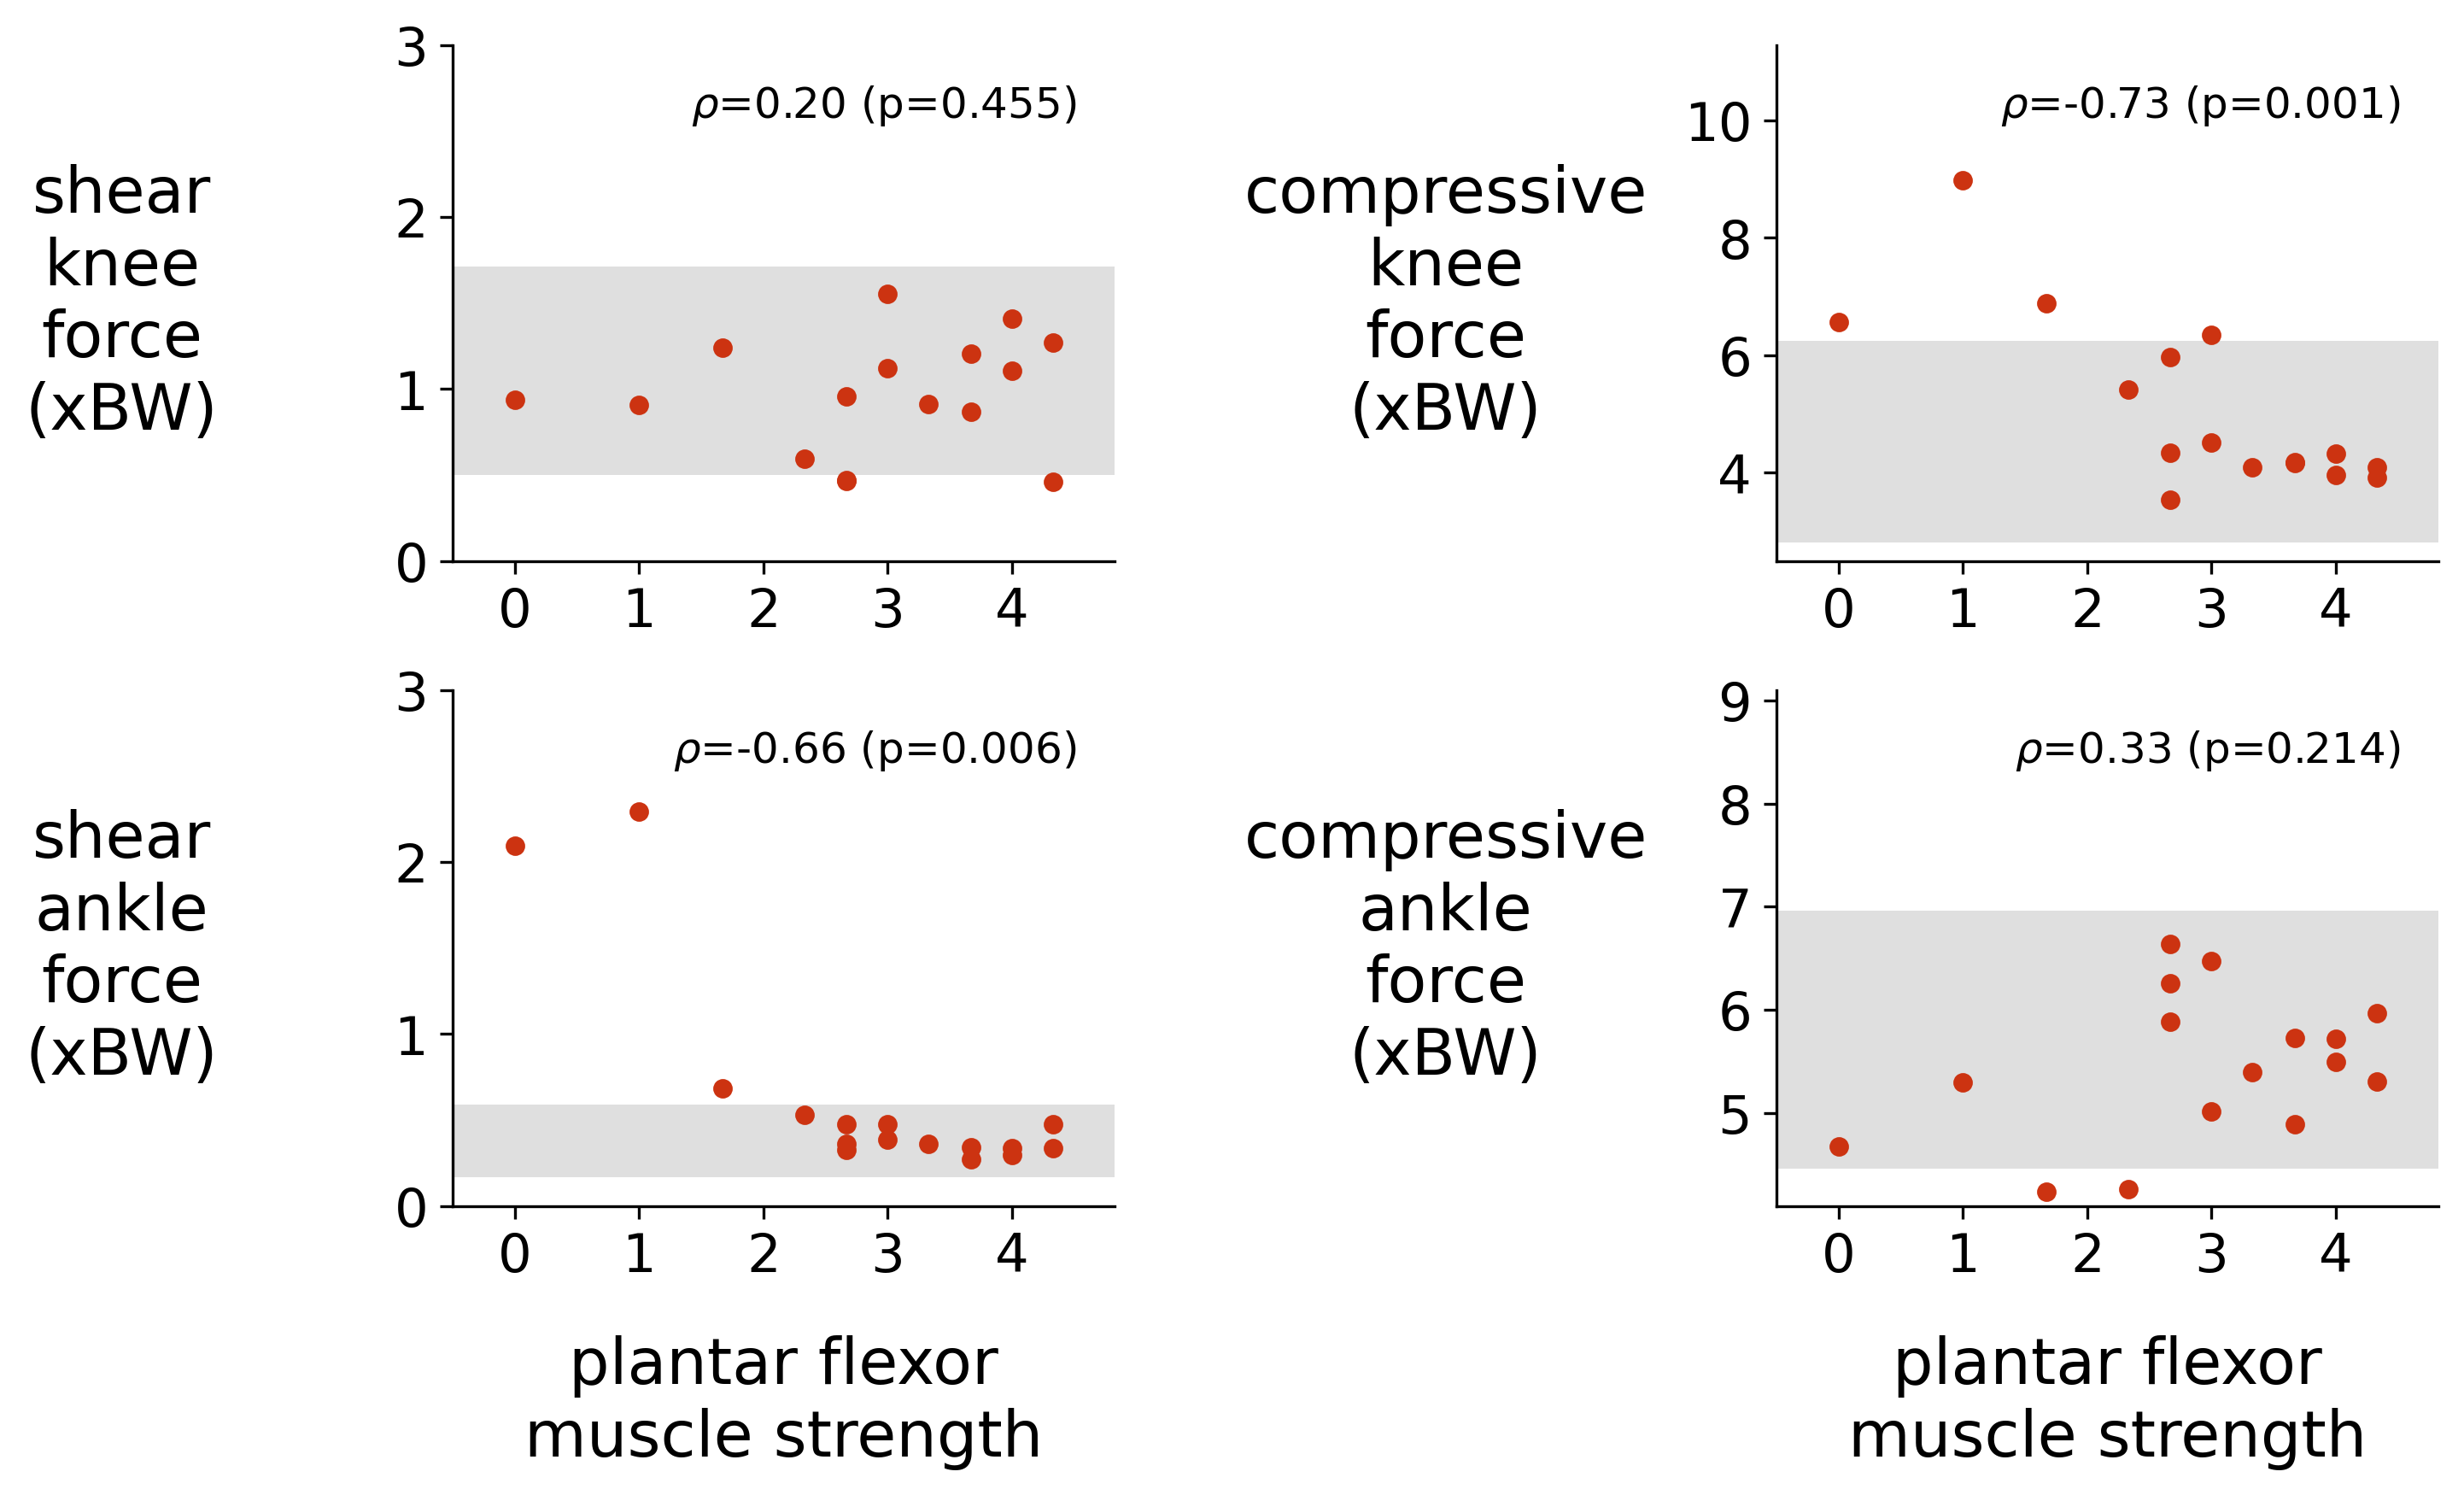

In [22]:
force_dict = {'walker_knee_on_tibia_in_tibia_shear_peak': 'shear\nknee\nforce',
              'walker_knee_on_tibia_in_tibia_fy_peak': 'compressive\nknee\nforce',
              'ankle_on_tibia_in_tibia_shear_peak': 'shear\nankle\nforce',
              'ankle_on_tibia_in_tibia_fy_peak': 'compressive\nankle\nforce'}

f, axes = plt.subplots(2, 2, dpi=300)
force_names = list(force_dict.keys())
for i in range(len(force_names)):
    plt.subplot(2,2,i+1)
    force = force_names[i]

    td_peaks = np.abs(np.divide(td_force_peaks[force],
                                9.81*td_force_peaks['bodymass']))    
    td_x = np.linspace(min(sb_force_peaks['plantar flexor strength'])-0.5,
                       max(sb_force_peaks['plantar flexor strength'])+0.5, 2)
    td_mean = np.mean(td_peaks)
    td_sd = np.std(td_peaks)
    plt.fill_between(td_x, td_mean-2*td_sd, td_mean+2*td_sd, color='gray',
                     alpha=0.25, linewidth=0)
    
    sb_peaks = np.abs(np.divide(sb_force_peaks[force],
                                9.81*sb_force_peaks['bodymass']))
    r_sb, p_sb = spearmanr(sb_force_peaks['plantar flexor strength'], sb_peaks)
    plt.scatter(sb_force_peaks['plantar flexor strength'], sb_peaks, color=COLOR_SB,
                s=20, label=r"$\rho$=%.2f (p=%.3f)" %(r_sb, p_sb))

    if i in [2, 3]:
        plt.xlabel('plantar flexor\nmuscle strength', fontsize=18)

    ylabel = force_dict[force] + '\n(xBW)'
    plt.ylabel(ylabel, fontsize=18, rotation=0, verticalalignment='center')
    
    plt.xlim([min(sb_force_peaks['plantar flexor strength'])-0.5,
              max(sb_force_peaks['plantar flexor strength'])+0.5])

    ax = plt.gca()
    ax.yaxis.set_label_coords(-0.5, 0.5)
    ax.xaxis.set_label_coords(0.5, -0.25)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    if 'shear' in ylabel:
        _, ylim = ax.get_ylim()
        new_ylim = int(np.ceil(ylim+0.5))
        plt.ylim([0, new_ylim])
        plt.yticks(list(range(new_ylim+1)), list(range(new_ylim+1)))
    elif 'compressive' in ylabel:
        ymin, ymax = ax.get_ylim()
        plt.ylim([ymin, ymax+2])
    
    leg = plt.legend(handlelength=0, handletextpad=0, frameon=False, fontsize=12)
    for item in leg.legendHandles:
        item.set_visible(False)
    
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

f.set_figheight(6)
f.set_figwidth(10)
plt.subplots_adjust(wspace=1, hspace=0.25)
plt.savefig('../postprocessing/figures/pf_strength.png', bbox_inches='tight')

# Plantar flexor strength vs bone strength

## Using raw values

In [23]:
# merge pf strength and bone property dataframes
sb_bone_pfstrength = sb_bone_outcomes.merge(sb_demographics, on=['subject'])

In [24]:
for bone_outcome_name in bone_outcome_names:
    x = sb_bone_pfstrength['plantar flexor strength']
    y = sb_bone_pfstrength[bone_outcome_name]
    
    r, p = spearmanr(x, y)
    print('rho = %.2f (p = %.3f)' %(r, p))

rho = -0.13 (p = 0.627)
rho = 0.15 (p = 0.588)
rho = -0.16 (p = 0.562)
rho = -0.08 (p = 0.760)
rho = 0.02 (p = 0.944)
rho = -0.09 (p = 0.735)
rho = 0.10 (p = 0.703)
rho = -0.01 (p = 0.974)


## Using unit-normalized values

In [25]:
for bone_outcome_name in bone_outcome_names:
    x = sb_bone_pfstrength['plantar flexor strength']    
    y = sb_bone_pfstrength[bone_outcome_name].to_numpy()
    
    if '(mm)' in bone_outcome_name:
        height = sb_bone_pfstrength['height (cm)'].to_numpy()
        y = y / height
    elif '(mm2)' in bone_outcome_name:
        height = sb_bone_pfstrength['height (cm)'].to_numpy()
        y = y / height**2
    elif '(mg/cm3)' in bone_outcome_name:
        height = sb_bone_pfstrength['height (cm)'].to_numpy()
        mass = sb_bone_pfstrength['weight (kg)'].to_numpy()
        y = y / (mass / height**3)
    
    r, p = spearmanr(x, y)
    print('rho = %.2f (p = %.3f)' %(r, p))

rho = -0.19 (p = 0.479)
rho = 0.06 (p = 0.836)
rho = -0.07 (p = 0.802)
rho = -0.16 (p = 0.543)
rho = -0.07 (p = 0.802)
rho = -0.09 (p = 0.731)
rho = 0.26 (p = 0.327)
rho = -0.08 (p = 0.760)


Plantar flexor muscle strength was not correlated with bone outcomes in the group with spina bifida.